Please define the number of STS Cranes: 9
Please define the maximum number of Iterations: 100
Please define the number of Particles: 100

  -> PSO Algorithm is now running. 

Iteration: 0 



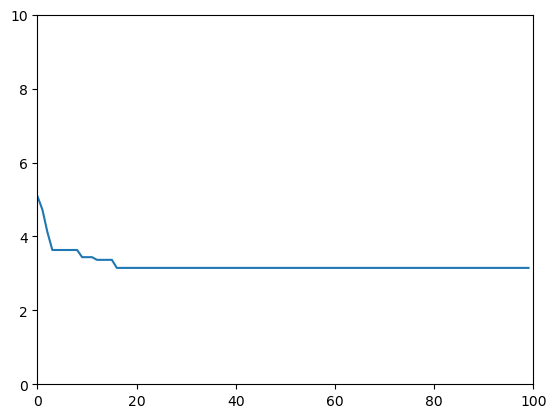

Worst fitness value = 8.719346049046322
Worst time intervals:  [0. 0. 0. 0. 0. 0. 0. 0. 0.]


Best fitness value = 3.148652739933394
Best time intervals:  [  0  14  31  42  46  70  87  92 120]


Even Timing fitness value =  3.9963669391462306
Even time intervals:  [0, 13, 26, 40, 53, 66, 80, 93, 106]


In case of Even Time Fitness < Best Cost Fitness please increase number of Iterations and/or number of Particles


In [1]:
# %% Import Library


import numpy as np
import matplotlib.pyplot as plt

# %% Crane Sum Vector


cranes = np.zeros(240)  # Creates zero value vector with 240 indexes

# Opens STS Crane Power Demand Profile file
with open("magpie_crane.csv") as file_name:
    array = np.loadtxt(file_name, delimiter=",", dtype=int)

# Calculates Worst possible Fitness Value

d = input('Please define the number of STS Cranes: ')  # Number of cranes
d = int(d)  # Converts str to int

worst_array = array * d
Worst_Cost = np.max(worst_array)/np.average(worst_array)

even_timing = [(120/d)*x for x in range(0, d)]

# %% Cost function


def sphere(x):

    cranes_1 = np.zeros(240)
    looper_2 = 0

    while looper_2 < d:

        aux_1 = 0

        for cnt in range(int(x[looper_2]), int(x[looper_2]) + len(array)):

            cranes_1[cnt] = cranes_1[cnt] + array[aux_1]
            aux_1 = aux_1 + 1

        looper_2 = looper_2 + 1

    z = np.max(cranes_1) / np.average(cranes_1)

    return z

# %% Parameter Setting


xMin, xMax = 0, len(array)  # Position Boundaries (0,120), ve o tamanho do ciclo que está no array. Neste caso 120 mas assim fica automatico
vMin, vMax = -0.2*(xMax - xMin), 0.2*(xMax - xMin)  # Velocity Boundaries
MaxIt = input('Please define the maximum number of Iterations: ')  # Max Iterations
MaxIt = int(MaxIt)  # Converts str to int
ps = input('Please define the number of Particles: ')  # Number of Particles
ps = int(ps)  # Converts str to int
c1 = 2  # Personal Acceleration Coefficient
c2 = 2  # Global Acceleration Coefficient
w = 0.9 - ((0.9-0.4)/MaxIt)*np.linspace(0, MaxIt, MaxIt)  # Inertia Coefficient

print("\n", " -> PSO Algorithm is now running.", "\n")

# %% Position & Velocity Boundary Checks


def limit_v(v):  # Velocity Limit Check Function

    for i in range(len(v)):

        if v[i] > vMax:
            v[i] = vMax

        if v[i] < vMin:
            v[i] = vMin

    return v


def limit_x(x):  # Position Limit Check Function

    for i in range(len(x)):

        if x[i] > xMax:
            x[i] = xMax

        if x[i] < xMin:
            x[i] = xMin

    return x

# %% Initialization


def optimization():
    class Particle:
        def __init__(self):  # Initializes Particles
            self.position = np.random.uniform(xMin, 50, [ps, d])  # initializes particle positions
            self.velocity = np.random.uniform(vMin, vMax, [ps, d])  # initializes particle velocities

            self.cost = np.zeros(ps)  # creates cost vector
            self.cost.fill(1000)  # fills cost vector with initial, very large, values

            self.pbest = np.copy(self.position)  # fills pbest with current positions
            self.pbest_cost = np.copy(self.cost)  # fills pbest_cost with current costs

            self.index = np.argmin(self.pbest_cost)
            self.gbest = self.pbest[self.index]
            self.gbest_cost = self.pbest_cost[self.index]

            self.BestCost = np.empty(MaxIt)  # creates Best Cost storing array
            self.BestCost.fill(1000)  # fills Best Cost array with very large value

# %% Main Loop

        def evaluate(self):

            # Iteration Loop
            for it in range(MaxIt):

                if it % 100 == 0:
                    print('Iteration:', it, '\n')  # Prints Current nth Loop Iteration

                # Population Loop
                for i in range(ps):

                    # Updates velocity
                    self.velocity[i] = (w[it] * self.velocity[i]
                                        + c1 * np.random.rand(d) * (self.pbest[i] - self.position[i])
                                        + c2 * np.random.rand(d) * (self.gbest - self.position[i]))

                    # Checks if velocity is within the set limits
                    self.velocity[i] = limit_v(self.velocity[i])

                    # Updates position based on velocity
                    self.position[i] = self.position[i] + self.velocity[i]

                    # Checks if position is within the set boundaries
                    self.position[i] = limit_x(self.position[i])

                    # Calculates cost of new positions
                    self.cost[i] = sphere(self.position[i])

                    # Checks if new cost is better than the particle´s previous best cost
                    if self.cost[i] < self.pbest_cost[i]:

                        self.pbest[i] = self.position[i]
                        self.pbest_cost[i] = self.cost[i]

                        # Checks if new cost is better than the previous global best cost
                        if self.pbest_cost[i] < self.gbest_cost:

                            self.gbest = self.pbest[i]
                            self.gbest_cost = self.pbest_cost[i]

                # Stores the iteration global best value to the array (can be equal to previous)
                self.BestCost[it] = self.gbest_cost

# %% Results Presentation

        def plot(self):

            plt.plot(self.BestCost)  # Plots Best Cost Array
            plt.ylim(0, 10)  # Sets Y axis limits for plot
            plt.xlim(0, MaxIt)  # Sets X axis limits for plot
            plt.show()  # Presents plot
            printer = MaxIt - 1  # Aux for printing the correct Best Cost index
            print('Worst fitness value =', Worst_Cost)  # Presents Worst Cost possible
            worst_timing = np.zeros(d)
            print('Worst time intervals: ', worst_timing)
            print('\n')
            print('Best fitness value =', self.BestCost[printer])  # Presents Best Cost value
            int_gbest = self.gbest.astype(int)  # Converts Best Cost array values to int values
            int_gbest.sort()  # Sorts Best Cost array from smallest to largest
            print('Best time intervals: ', int_gbest)  # Prints best Time Intervals for cranes
            print('\n')
            even_cost = sphere(even_timing)
            print('Even Timing fitness value = ', even_cost)
            print('Even time intervals: ', [int(even_timing) for even_timing in even_timing])
            print('\n')
            print('In case of Even Time Fitness < Best Cost Fitness please increase'
                  ' number of Iterations and/or number of Particles')

    a = Particle()
    a.evaluate()
    a.plot()

# %% RUN


optimization()


The output show if nothing was done (worst), the dispatch minimizing the peak (Best fitness) and the option if an even spacing between the cranes approach was followed.